In [91]:
import numpy as np
import spacecharger as sc
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.interpolate import RegularGridInterpolator

In [92]:
lab_E, lab_B, xx, zz = sc.routine("input_file.py")

In [93]:
def closestVal(val, array, dx = None):
    if dx == None:
        dx = array[1] - array[0]

    # clip val to be in the array
    val = np.clip(val, array[0], array[-1])

ER_values shape: (5, 33)
EZ_values shape: (5, 33)
[-2.11487611e-09]


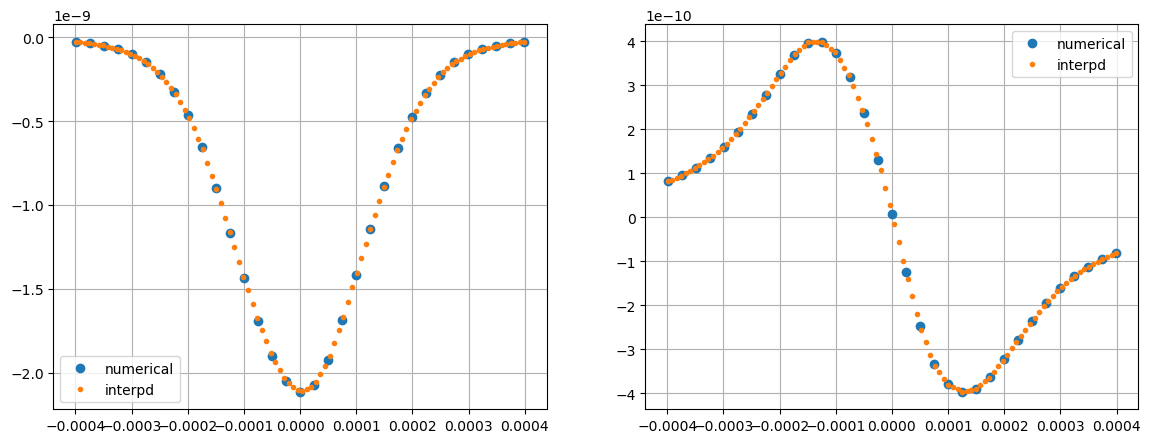

In [98]:
shared_id = 3

ER_values = lab_E[:, shared_id, :, 0]  # shape (5,33)
EZ_values = lab_E[:, shared_id, :, 2]  # shape (5,33)
print("ER_values shape:", ER_values.shape)
print("EZ_values shape:", ER_values.shape)
ERint = RegularGridInterpolator((xx, zz), ER_values)
EZint = RegularGridInterpolator((xx, zz), EZ_values)

z_superdense = np.linspace(zz[0], zz[-1], num=100)
erw = [ERint([1e-4, z]) for z in z_superdense]
wre = [EZint([1e-4, z]) for z in z_superdense]

print(ERint([1e-4, 0]))

# now i have the radial and electric fields for any z and r
fig, axs = plt.subplots(1,2, figsize=(14, 5))

axs[0].grid()
axs[0].plot(zz, lab_E[4, shared_id, :][:,0], 'o', label="numerical")
axs[0].plot(z_superdense, erw, '.',label="interpd")
axs[0].legend()

axs[1].grid()
axs[1].plot(zz, lab_E[4, shared_id, :][:,2], 'o', label="numerical")
axs[1].plot(z_superdense, wre, '.', label="interpd")
axs[1].legend()

[-2.11487611e-09]


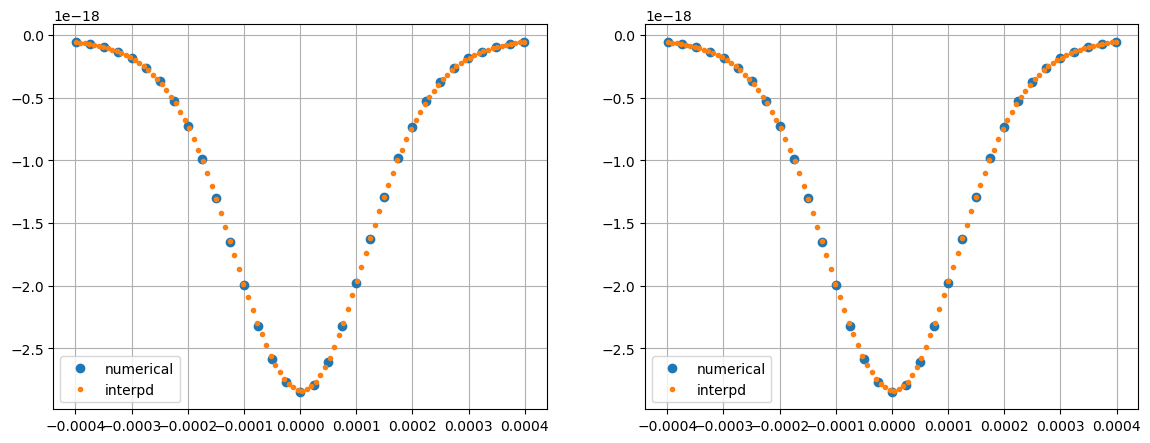

In [103]:
shared_id = 0

BX_values = lab_B[:, shared_id, :, 0]  # shape (5,33)
BY_values = lab_B[:, shared_id, :, 1]  # shape (5,33)
BXint = RegularGridInterpolator((xx, zz), BX_values)
BYint = RegularGridInterpolator((xx, zz), BY_values)

z_superdense = np.linspace(zz[0], zz[-1], num=100)
erw = [BXint([1e-4, z]) for z in z_superdense]
wre = [BYint([1e-4, z]) for z in z_superdense]

print(ERint([1e-4, 0]))

# now i have the radial and electric fields for any z and r
fig, axs = plt.subplots(1,2, figsize=(14, 5))

axs[0].grid()
axs[0].plot(zz, lab_B[4, shared_id, :][:,0], 'o', label="numerical")
axs[0].plot(z_superdense, erw, '.',label="interpd")
axs[0].legend()

axs[1].grid()
axs[1].plot(zz, lab_B[4, shared_id, :][:,1], 'o', label="numerical")
axs[1].plot(z_superdense, wre, '.', label="interpd")
axs[1].legend()

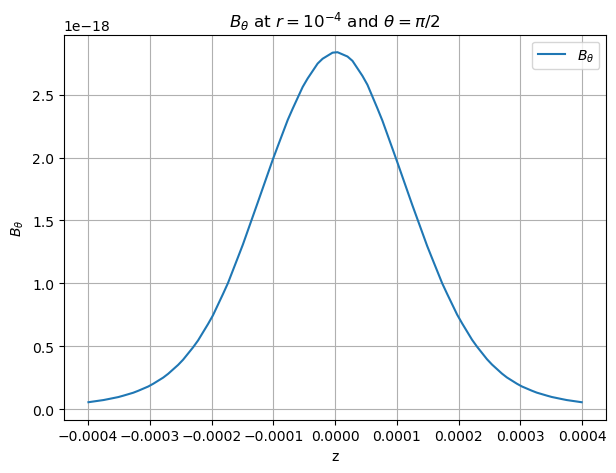

In [123]:
theta = np.pi/2

BX_along_z = np.array([BXint([1e-4, z]) for z in z_superdense])
BY_along_z = np.array([BYint([1e-4, z]) for z in z_superdense])

# Compute B_theta
B_theta_along_z = -BX_along_z * np.sin(theta) + BY_along_z * np.cos(theta)

# Plot B_theta
plt.figure(figsize=(7,5))
plt.grid()
plt.plot(z_superdense, B_theta_along_z, label=r"$B_\theta$")
plt.xlabel("z")
plt.ylabel(r"$B_\theta$")
plt.legend()
plt.title(r"$B_\theta$ at $r=10^{-4}$ and $\theta=\pi/2$")
plt.show()